# Overlapping analysis with constant attribution score cutoff (top 100)

In [1]:
import pandas as pd


pd.set_option("display.max_columns", None) # show all cols
pd.set_option('display.max_colwidth', None) # show full width of showing cols
pd.set_option("display.expand_frame_repr", False) # print cols side by side as it's supposed to be

In [2]:
import os
import pandas as pd
from pathlib import Path


bedDir = Path(os.environ['GENOMICS_DATA_BASE'], 'genome_nlp_tokens', 'bed_files', 'ECOLI')

bedDfList = []
for bedFile in os.listdir(bedDir):
    tubeid = bedFile.split('.')[0].split('_')[0]
    tokensDf = pd.read_csv(Path(bedDir, bedFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score'])
    tokensDf['tube_id'] = tubeid
    bedDfList.append(tokensDf)

bedDf = pd.concat(bedDfList, ignore_index=True)
bedDf


,contig_id,start_position,end_position,tokens,score,tube_id
0,1,1,3,GAA,0.024555,AH21B049
1,1,4,12,AAACCCCGG,0.019281,AH21B049
2,1,13,17,TCAAT,0.042749,AH21B049
3,1,18,22,AAGGC,0.058446,AH21B049
4,1,23,27,CGGGG,-0.002272,AH21B049
...,...,...,...,...,...,...
247349726,5,259913,259920,GCTACCCG,0.012245,ALF22C077
247349727,5,259921,259928,TTGGTGTG,0.000125,ALF22C077
247349728,5,259929,259938,CCTGTTCCGT,-0.000540,ALF22C077
247349729,5,259939,259942,GGCC,0.024973,ALF22C077


In [3]:
bedDf['token_length'] = bedDf.tokens.apply(lambda x: len(x))
bedDf

,contig_id,start_position,end_position,tokens,score,tube_id,token_length
0,1,1,3,GAA,0.024555,AH21B049,3
1,1,4,12,AAACCCCGG,0.019281,AH21B049,9
2,1,13,17,TCAAT,0.042749,AH21B049,5
3,1,18,22,AAGGC,0.058446,AH21B049,5
4,1,23,27,CGGGG,-0.002272,AH21B049,5
...,...,...,...,...,...,...,...
247349726,5,259913,259920,GCTACCCG,0.012245,ALF22C077,8
247349727,5,259921,259928,TTGGTGTG,0.000125,ALF22C077,8
247349728,5,259929,259938,CCTGTTCCGT,-0.000540,ALF22C077,10
247349729,5,259939,259942,GGCC,0.024973,ALF22C077,4


In [4]:
highscoreDf = bedDf.sort_values(by=['score'], ascending=False)[:100]
highscoreDf

,contig_id,start_position,end_position,tokens,score,tube_id,token_length
106971408,5,275000,275001,CG,0.994362,AH18L059,2
197943648,4,402509,402513,TCGAT,0.991059,ALF22L083,5
197109127,1,1197500,1197506,CGTTGGC,0.984545,ALF22H044,7
117870964,1,622506,622509,GCAG,0.971440,AH19H076,4
220974321,4,240022,240024,TCA,0.962870,ALF22D139,3
...,...,...,...,...,...,...,...
187292979,3,337560,337565,GAAAAG,0.661372,AH19J007,6
212191255,4,267508,267512,GACTT,0.660703,AH21K086,5
202418656,1,365014,365020,CAGTAAT,0.659461,ALF22F004,7
221458562,3,450129,450132,CTGT,0.659006,AH20E044,4


In [5]:
highscoreDf.shape

(100, 7)

In [6]:
highscoreDf.token_length.value_counts()

token_length
6     26
5     22
3     13
7     13
9     10
4      9
2      3
10     2
1      1
8      1
Name: count, dtype: int64

<Axes: xlabel='token_length', ylabel='Count'>

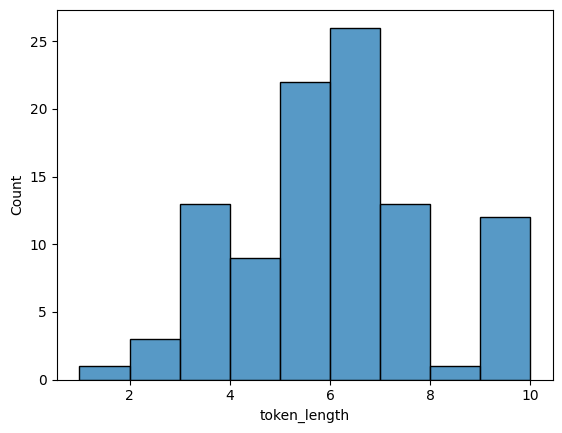

In [7]:
import seaborn as sns

sns.histplot(highscoreDf.token_length, binwidth=1)

## Obtain token overlaps with annotations

In [8]:
import os
import pandas as pd
from pathlib import Path


overlappingFilesDir = Path(os.environ['GENOMICS_DATA_BASE'], 'genome_nlp_tokens', 'overlapping_with_annotations', 'ECOLI')

overlappingDfList = []
for overlappingFile in os.listdir(overlappingFilesDir):
    df = pd.read_csv(Path(overlappingFilesDir, overlappingFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score', 'feature_type', 'id', 'name', 'gene', 'atributes'])
    df['tube_code'] = [overlappingFile.split('_')[0]]*df.shape[0]
    overlappingDfList.append(df)
overlappingDf = pd.concat(overlappingDfList, ignore_index=True)
overlappingDf


,contig_id,start_position,end_position,tokens,score,feature_type,id,name,gene,atributes,tube_code
0,1,665,671,GAATCAT,0.037687,CDS,IGMLFD_00005,Uncharacterized deacetylase YaiS,yaiS,"ID=IGMLFD_00005;Name=Uncharacterized deacetylase YaiS;locus_tag=IGMLFD_00005;product=Uncharacterized deacetylase YaiS;Dbxref=COG:COG2120,COG:G,EC:3.-.-.-,GO:0016811,RefSeq:WP_000362014.1,SO:0001217,UniParc:UPI0000DACD3F,UniRef:UniRef100_A0A0D8VZB7,UniRef:UniRef50_P71311,UniRef:UniRef90_P71311;gene=yaiS",AH19C036
1,1,672,680,TTTATGAAT,0.023426,CDS,IGMLFD_00005,Uncharacterized deacetylase YaiS,yaiS,"ID=IGMLFD_00005;Name=Uncharacterized deacetylase YaiS;locus_tag=IGMLFD_00005;product=Uncharacterized deacetylase YaiS;Dbxref=COG:COG2120,COG:G,EC:3.-.-.-,GO:0016811,RefSeq:WP_000362014.1,SO:0001217,UniParc:UPI0000DACD3F,UniRef:UniRef100_A0A0D8VZB7,UniRef:UniRef50_P71311,UniRef:UniRef90_P71311;gene=yaiS",AH19C036
2,1,681,683,AAC,-0.010186,CDS,IGMLFD_00005,Uncharacterized deacetylase YaiS,yaiS,"ID=IGMLFD_00005;Name=Uncharacterized deacetylase YaiS;locus_tag=IGMLFD_00005;product=Uncharacterized deacetylase YaiS;Dbxref=COG:COG2120,COG:G,EC:3.-.-.-,GO:0016811,RefSeq:WP_000362014.1,SO:0001217,UniParc:UPI0000DACD3F,UniRef:UniRef100_A0A0D8VZB7,UniRef:UniRef50_P71311,UniRef:UniRef90_P71311;gene=yaiS",AH19C036
3,1,684,689,AAAACC,0.024358,CDS,IGMLFD_00005,Uncharacterized deacetylase YaiS,yaiS,"ID=IGMLFD_00005;Name=Uncharacterized deacetylase YaiS;locus_tag=IGMLFD_00005;product=Uncharacterized deacetylase YaiS;Dbxref=COG:COG2120,COG:G,EC:3.-.-.-,GO:0016811,RefSeq:WP_000362014.1,SO:0001217,UniParc:UPI0000DACD3F,UniRef:UniRef100_A0A0D8VZB7,UniRef:UniRef50_P71311,UniRef:UniRef90_P71311;gene=yaiS",AH19C036
4,1,690,698,TTCACCCAG,0.031550,CDS,IGMLFD_00005,Uncharacterized deacetylase YaiS,yaiS,"ID=IGMLFD_00005;Name=Uncharacterized deacetylase YaiS;locus_tag=IGMLFD_00005;product=Uncharacterized deacetylase YaiS;Dbxref=COG:COG2120,COG:G,EC:3.-.-.-,GO:0016811,RefSeq:WP_000362014.1,SO:0001217,UniParc:UPI0000DACD3F,UniRef:UniRef100_A0A0D8VZB7,UniRef:UniRef50_P71311,UniRef:UniRef90_P71311;gene=yaiS",AH19C036
...,...,...,...,...,...,...,...,...,...,...,...
92771815,5,357109,357119,CGGCAGACGAA,0.017858,CDS,KCGHAI_11840,Phage-related protein%2C tail assembly protein I,NaN,"ID=KCGHAI_11840;Name=Phage-related protein%2C tail assembly protein I;locus_tag=KCGHAI_11840;product=Phage-related protein%2C tail assembly protein I;Dbxref=COG:COG4723,COG:X,RefSeq:WP_000847668.1,SO:0001217,UniParc:UPI00016DBD2D,UniRef:UniRef100_A0A0A6RKN9,UniRef:UniRef50_F4V9K2,UniRef:UniRef90_A0A369FJA2",AH19F069
92771816,5,357120,357125,GGGGAT,0.030131,CDS,KCGHAI_11840,Phage-related protein%2C tail assembly protein I,NaN,"ID=KCGHAI_11840;Name=Phage-related protein%2C tail assembly protein I;locus_tag=KCGHAI_11840;product=Phage-related protein%2C tail assembly protein I;Dbxref=COG:COG4723,COG:X,RefSeq:WP_000847668.1,SO:0001217,UniParc:UPI00016DBD2D,UniRef:UniRef100_A0A0A6RKN9,UniRef:UniRef50_F4V9K2,UniRef:UniRef90_A0A369FJA2",AH19F069
92771817,5,357126,357131,GGTGGT,0.045921,CDS,KCGHAI_11840,Phage-related protein%2C tail assembly protein I,NaN,"ID=KCGHAI_11840;Name=Phage-related protein%2C tail assembly protein I;locus_tag=KCGHAI_11840;product=Phage-related protein%2C tail assembly protein I;Dbxref=COG:COG4723,COG:X,RefSeq:WP_000847668.1,SO:0001217,UniParc:UPI00016DBD2D,UniRef:UniRef100_A0A0A6RKN9,UniRef:UniRef50_F4V9K2,UniRef:UniRef90_A0A369FJA2",AH19F069
92771818,5,357132,357138,CAGGTTG,-0.022747,CDS,KCGHAI_11840,Phage-related protein%2C tail assembly protein I,NaN,"ID=KCGHAI_11840;Name=Phage-related protein%2C tail assembly protein I;locus_tag=KCGHAI_11840;product=Phage-related protein%2C tail assembly protein I;Dbxref=COG:COG4723,COG:X,RefSeq:WP_000847668.1,SO:0001217,UniParc:UPI00016DBD2D,UniRef:UniRef100_A0A0A6RKN9,UniRef:UniRef50_F4V9K2,UniRef:UniRef90_A0A369FJA2",AH19F069


## Obtain annotation overlapping with top tokens

In [9]:
import pandas as pd

from pathlib import Path


for tokenLengthCutoff in range(5, 11):
    print('tokenLengthCutoff: ', str(tokenLengthCutoff))
    tokensDf = highscoreDf[highscoreDf.token_length == tokenLengthCutoff]
    signatureTokens = tokensDf.tokens.unique()
    tokenOverlapsDfs = []
    for signatureToken in signatureTokens:
        tokenOverlapsDf = overlappingDf[overlappingDf.tokens == signatureToken]
        tokenOverlapsDfs.append(tokenOverlapsDf)
    if tokenOverlapsDfs:
        finalTokenOverlapsDf = pd.concat(tokenOverlapsDfs, ignore_index=True)
        finalTokenOverlapsDf.drop_duplicates().to_csv(Path(os.environ['GENOMICS_DATA_BASE'], 'survival_analysis', 'ECOLI', 'constant_score_overlaping_annotations', 'top_100_tl_' + str(tokenLengthCutoff) + '.csv'), index=False)

tokenLengthCutoff:  5
tokenLengthCutoff:  6
tokenLengthCutoff:  7
tokenLengthCutoff:  8
tokenLengthCutoff:  9
tokenLengthCutoff:  10


## Create data for an upset plot

In [10]:
import os

from pathlib import Path

import pandas as pd


overlappingGenesDict = {}
overlappingAnnotationsDict = {}

for tokenLengthCutoff in range(5, 11):
    print('tokenLengthCutoff: ', str(tokenLengthCutoff))
    overlappingGenesPath = Path(os.environ['GENOMICS_DATA_BASE'], 'survival_analysis', 'ECOLI', 'constant_score_overlaping_annotations', 'top_100_tl_' + str(tokenLengthCutoff) + '.csv')
    if overlappingGenesPath.exists():
        overlappingGenesDf = pd.read_csv(overlappingGenesPath)
        overlappingGenesDict['Token Length > ' + str(tokenLengthCutoff)] = overlappingGenesDf.gene.unique()
        overlappingAnnotationsDict['Token Length > ' + str(tokenLengthCutoff)] = overlappingGenesDf

tokenLengthCutoff:  5
tokenLengthCutoff:  6
tokenLengthCutoff:  7
tokenLengthCutoff:  8
tokenLengthCutoff:  9
tokenLengthCutoff:  10


## Generate upset plot

/home/vmadmin/workspace/alfred-data-analysis/.venv/lib/python3.10/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/home/vmadmin/workspace/alfred-data-analysis/.venv/lib/python3.10/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the 

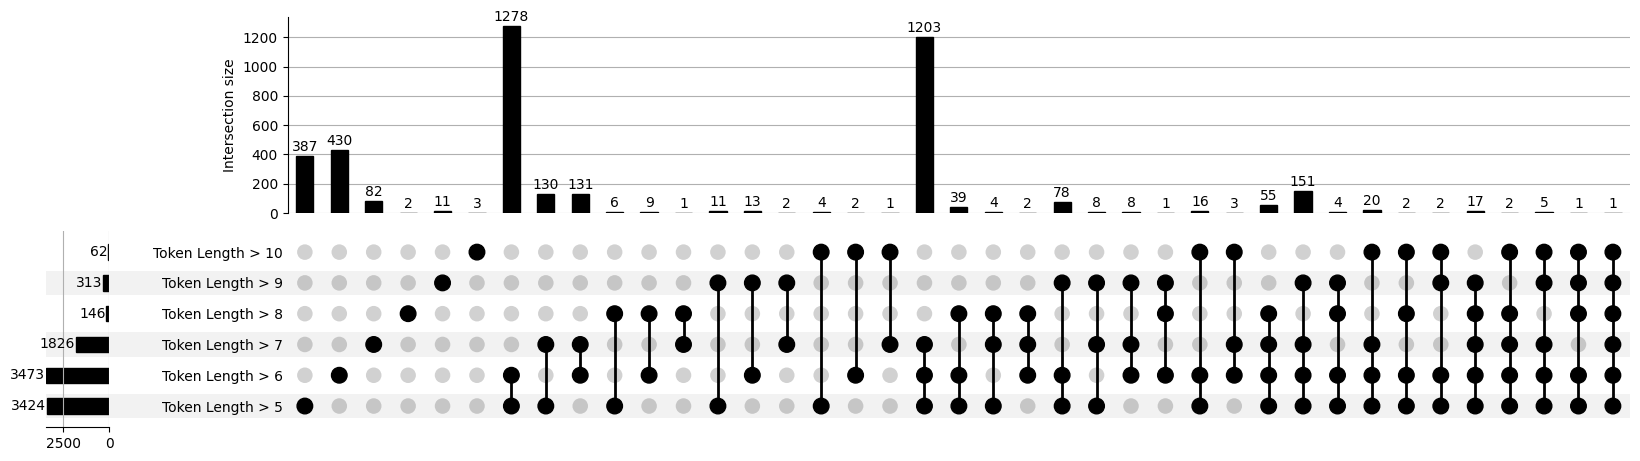

In [11]:
from upsetplot import UpSet

from upsetplot import from_contents


ax_dict = UpSet(from_contents(overlappingGenesDict), show_counts=True, sort_categories_by='input').plot()

## Obtain singature genes

In [12]:
singatureGenes = set()

### Common overlapping genes

In [13]:
singatureGenes.update(set.intersection(*[set([v for v in value if str(v) != 'nan']) for key, value in overlappingGenesDict.items()]))

### Common genes in `Token Length > 5`, `Token Length > 6`, `Token Length > 8`, `Token Length > 9`, `Token Length > 10`

In [14]:
singatureGenes.update(set.intersection(*[set([v for v in value if str(v) != 'nan']) for key, value in overlappingGenesDict.items() if (key and (key != 'Token Length > 7'))]))

### Common genes in `Token Length > 5`, `Token Length > 6`, `Token Length > 7`, `Token Length > 9`, `Token Length > 10`

In [15]:
singatureGenes.update(set.intersection(*[set([v for v in value if str(v) != 'nan']) for key, value in overlappingGenesDict.items() if (key and (key != 'Token Length > 8'))]))

### Common genes in `Token Length > 5`, `Token Length > 6`, `Token Length > 7`, `Token Length > 8`, `Token Length > 10`

In [16]:
singatureGenes.update(set.intersection(*[set([v for v in value if str(v) != 'nan']) for key, value in overlappingGenesDict.items() if (key and (key != 'Token Length > 9'))]))

### Common genes in `Token Length > 5`, `Token Length > 6`, `Token Length > 7`, `Token Length > 8`, `Token Length > 9`

In [17]:
singatureGenes.update(set.intersection(*[set([v for v in value if str(v) != 'nan']) for key, value in overlappingGenesDict.items() if (key and (key != 'Token Length > 10'))]))

## Display signature gene names

In [18]:
singatureGenes

{'acrB',
 'cdiA',
 'clbB',
 'cysA',
 'dgoT',
 'dinG',
 'dnaG',
 'fimA',
 'flgL',
 'flhA',
 'flhB',
 'hisB',
 'hsdR',
 'kdpA',
 'lysR',
 'pdeA',
 'plaP',
 'rcsD',
 'tdcA',
 'tsaD',
 'uidC',
 'xerD',
 'ydhK',
 'yebS',
 'yprA'}

## Display signature genes along with their description

In [19]:
overlappingDf[['name', 'gene']][overlappingDf.gene.isin(singatureGenes)].drop_duplicates().sort_values(by=['gene'])

,name,gene
12025,efflux RND transporter permease AcrB,acrB
1927735,Multidrug efflux pump subunit AcrB,acrB
53998770,contact-dependent inhibition toxin CdiA,cdiA
16386198,contact-dependent inhibition effector tRNA nuclease,cdiA
92469806,Toxin CdiA,cdiA
53192819,Colibactin hybrid non-ribosomal peptide synthetase/type I polyketide synthase ClbB,clbB
239084,colibactin hybrid non-ribosomal peptide synthetase/type I polyketide synthase ClbB,clbB
189158,ABC-type sulfate/molybdate transport systems%2C ATPase component,cysA
120199,sulfate/thiosulfate ABC transporter ATP-binding protein CysA,cysA
55737677,Sulfate/thiosulfate import ATP-binding protein CysA,cysA


## Export tokens to visualise

In [36]:
highscoreOverlappingFilesDir = Path(os.environ['GENOMICS_DATA_BASE'], 'genome_nlp_tokens', 'highscore_overlapping', 'ECOLI')

for tubeCode in overlappingDf.tube_code.unique():
    print('tubeCode: ', tubeCode)
    highscoreOverlappingDf = overlappingDf[(overlappingDf.tube_code == tubeCode)].merge(
        highscoreDf[['tokens']],
        how='inner',
        on=['tokens']
    )[['contig_id', 'start_position', 'end_position', 'tokens']].drop_duplicates()
    highscoreOverlappingFile = Path(highscoreOverlappingFilesDir, tubeCode + '.bed')
    highscoreOverlappingDf.to_csv(highscoreOverlappingFile, sep='\t', index=False, header=None)

tubeCode:  AH19C036
tubeCode:  AH19C073
tubeCode:  AH19G061
tubeCode:  AH20H014
tubeCode:  AH19A069
tubeCode:  AH19H020
tubeCode:  AH18J033
tubeCode:  AH19A039
tubeCode:  AH20D043
tubeCode:  AH19B003
tubeCode:  AH19B048
tubeCode:  AH20I033
tubeCode:  AH19H010
tubeCode:  AH20A006
tubeCode:  AH20I026
tubeCode:  AH19C029
tubeCode:  AH19G015
tubeCode:  AH19H037
tubeCode:  AH18K018
tubeCode:  AH19G062
tubeCode:  AH20J012
tubeCode:  AH19E018
tubeCode:  AH19H013
tubeCode:  AH20J070
tubeCode:  AH20B073
tubeCode:  AH20F017
tubeCode:  AH20H048
tubeCode:  AH19B011
tubeCode:  AH20J067
tubeCode:  AH19A041
tubeCode:  AH19L046
tubeCode:  AH19G076
tubeCode:  AH19F084
tubeCode:  AH19C082
tubeCode:  AH19A066
tubeCode:  AH19A097
tubeCode:  AH20F006
tubeCode:  AH18J011
tubeCode:  AH20C079
tubeCode:  AH18L037
tubeCode:  AH20H050
tubeCode:  AH19C011
tubeCode:  AH19F020
tubeCode:  AH19H061
tubeCode:  AH19J016
tubeCode:  AH20B068
tubeCode:  AH18K048
tubeCode:  AH19A003
tubeCode:  AH19K033
tubeCode:  AH20E084
